# Code to generate all figures on heatwaves events used in the paper
## note this is spread across multiple figures
## TODO: Update the specific list once we are done

In [3]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics
sns.set_theme(style='whitegrid')
from shapely.geometry import Polygon
import shapely
from pathlib import Path
import multiprocessing
from datetime import timedelta, datetime
import xarray as xr

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

# ugly hack to load in our plotting scripts
import sys
sys.path.append(basepath + "/docs/notebooks/")
import case_plotting as cp

In [4]:
# setup the templates to load in the data

# Forecast Examples
cira_heatwave_forecast_FOURv2_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 IFS",
)

cira_heatwave_forecast_GC_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC IFS",
)

cira_heatwave_forecast_PANG_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG IFS",
)

cira_heatwave_forecast_FOURv2_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 GFS",
)

cira_heatwave_forecast_GC_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC GFS",
)

cira_heatwave_forecast_PANG_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG GFS",
)

hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=["surface_air_temperature"],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
    name="ECMWF HRES",
)

heat_metrics = [
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ]

FOURv2_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
]

GC_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
]

PANG_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
]

HRES_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]

In [5]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

fourv2_color = sns_palette[0]
gc_color = sns_palette[1]
pangu_color = sns_palette[2]
hres_color = sns_palette[3]

ifs_color = sns_palette[0]
gfs_color = sns_palette[3]

In [6]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()

# turn the dictionary into a list of case objects ()
ewb_cases = cases.load_individual_cases(case_dict)

ewb_fourv2 = evaluate.ExtremeWeatherBench(case_dict, FOURv2_HEAT_EVALUATION_OBJECTS)
ewb_gc = evaluate.ExtremeWeatherBench(case_dict, GC_HEAT_EVALUATION_OBJECTS)
ewb_pang = evaluate.ExtremeWeatherBench(case_dict, PANG_HEAT_EVALUATION_OBJECTS)
ewb_hres = evaluate.ExtremeWeatherBench(case_dict, HRES_HEAT_EVALUATION_OBJECTS)

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


# the next two cells either load in your results from scratch (first cell) or you can load them from a saved pickle file (must faster)

In [22]:
# load in the results for all heat waves in parallel
# this will take awhile to run if you do them all in one code box 
# if you have already saved them (from running this once), then skip this box
n_threads_per_process = 4
n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

fourv2_results = ewb_fourv2.run(parallel=True, n_jobs=n_processes, pre_compute=True)
gc_results = ewb_gc.run(parallel=True, n_jobs=n_processes, pre_compute=True)
pang_results = ewb_pang.run(parallel=True, n_jobs=n_processes, pre_compute=True)
hres_results = ewb_hres.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# save the results to make it more efficient
fourv2_results.to_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
gc_results.to_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')
pang_results.to_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
hres_results.to_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')


Forecast dataset for case 1 has no data for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00.
Forecast dataset for case 1 has no data for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a mem

In [7]:
# load the results back in
fourv2_results = pd.read_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
pang_results = pd.read_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
hres_results = pd.read_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')
gc_results = pd.read_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')


# plotting and subsetting code

In [8]:
def subset_results_to_xarray(results_df, forecast_source, target_source, metric, init_time=None, case_id_list=None):
    """
    takes in one of the overall results tables and returns a multi-dimensional xarray for easier plotting 
    """
    # if the case_id_list is not empty, subset to the specific cases
    if (case_id_list is not None):
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & 
                            (results_df['metric'] == metric) & (results_df['case_id_number'].isin(case_id_list))]
    else:
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & (results_df['metric'] == metric)]

    subset = subset.astype({'lead_time':'timedelta64[ns]'})

    # if the init time is specified, subset that
    if (init_time == 'zeroz'):
        # convert to a timedelta object so we can grab zeroz
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 0]
    elif (init_time == 'twelvez'):
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 43200]

    # prepare for xarray conversion
    subset2 = subset.set_index(['lead_time', 'case_id_number']).sort_index()
    subset_xa = subset2.to_xarray()

    return subset_xa

def plot_results_by_metric(data, title, filename=None):
    sns.set_theme(style='whitegrid')
    sns_palette = sns.color_palette("tab10")
    fig, ax = plt.subplots(figsize=(16,4))

    for model in data:
        my_mean = model['values']['value'].mean('case_id_number')
        my_n = len(np.unique(model['values']['case_id_number'].values))
        plt.plot(my_mean, color=model['color'], linewidth=2, label=f"{model['label_str']} (n={my_n})", linestyle=model['linestyle'], marker=model['marker'], markersize=10)

    xtick_str = [f"{int(my_time/ np.timedelta64(1, 'D')):d}" for my_time in model['values']['lead_time'].values]
    ax.set_xticks(labels=xtick_str, ticks=np.arange(0, len(model['values']['lead_time']), 1))

    ax.set_ylabel('Celsius')
    ax.set_xlabel('Lead Time (days)')
    plt.title(title)
    plt.legend(loc='best', fontsize=12)

    if (filename is not None):
        plt.savefig(filename, bbox_inches='tight', dpi=300)


# example plots 

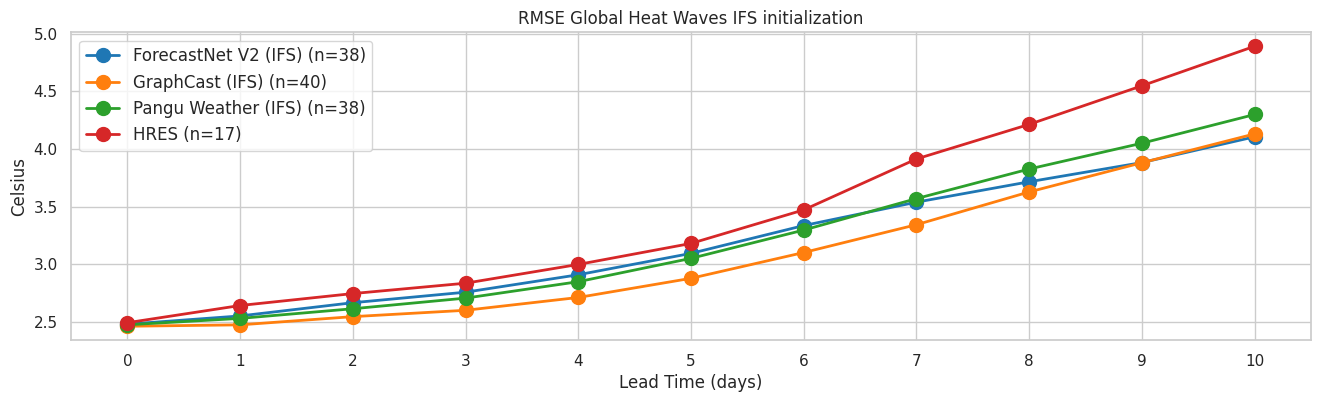

In [9]:
# plot the results for one metric for the three AI models versus HRES
fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')
hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz')


plot_results_by_metric(data=[fourv2_ifs_plot, gc_ifs_plot, pangu_ifs_plot, hres_plot], title='RMSE Global Heat Waves IFS initialization')


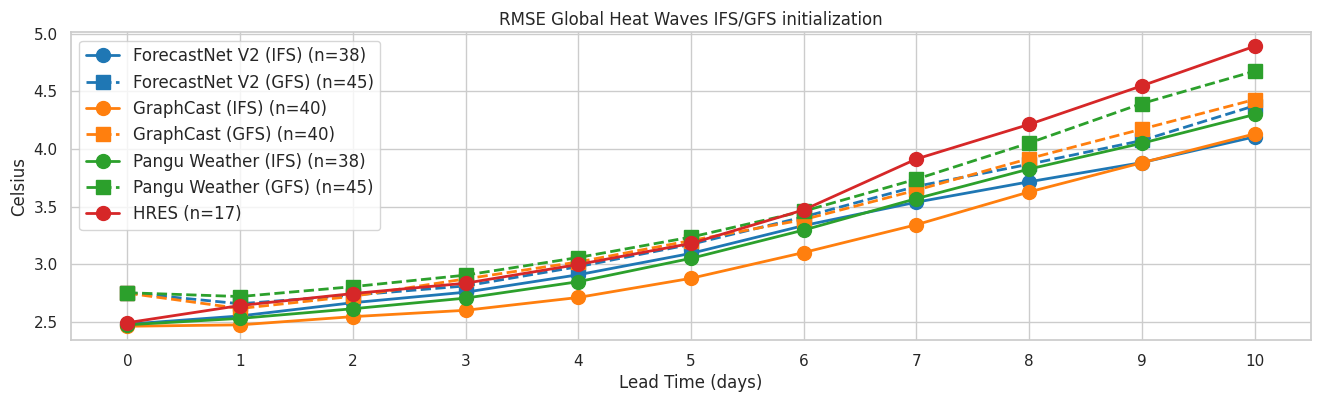

In [10]:
# compare IFS/GFS
fourv2_gfs_plot = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2 (GFS)', 'color': fourv2_color, 'linestyle':'--', 'marker':'s'}
gc_gfs_plot = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast (GFS)', 'color': gc_color, 'linestyle':'--', 'marker':'s'}
pangu_gfs_plot = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather (GFS)', 'color': pangu_color, 'linestyle':'--', 'marker':'s'}

fourv2_gfs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_gfs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_gfs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_gfs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_gfs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_gfs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')

plot_data = [fourv2_ifs_plot, fourv2_gfs_plot, gc_ifs_plot, gc_gfs_plot, pangu_ifs_plot, pangu_gfs_plot, hres_plot]

plot_results_by_metric(data=plot_data, title='RMSE Global Heat Waves IFS/GFS initialization')

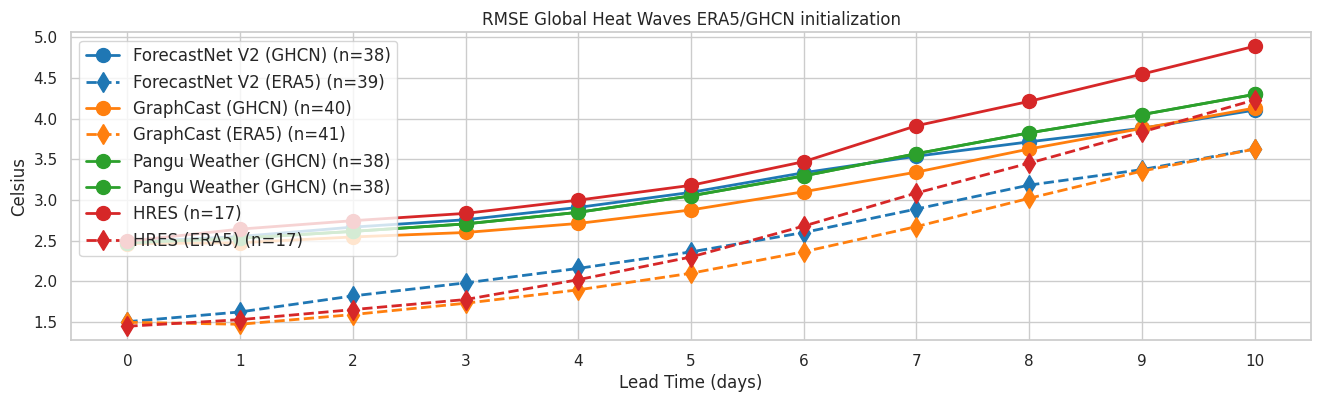

In [11]:
# plot ERA5 versus GHCN for IFS
fourv2_ifs_plot['label_str'] = 'ForecastNet V2 (GHCN)'
gc_ifs_plot['label_str'] = 'GraphCast (GHCN)'
pangu_ifs_plot['label_str'] = 'Pangu Weather (GHCN)'

fourv2_ifs_plot_era5 = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (ERA5)', 'color': fourv2_color, 'linestyle':'--', 'marker':'d'}
gc_ifs_plot_era5 = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (ERA5)', 'color': gc_color, 'linestyle':'--', 'marker':'d'}
pangu_ifs_plot_era5 = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (ERA5)', 'color': pangu_color, 'linestyle':'--', 'marker':'d'}
hres_plot_era5 = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES (ERA5)', 'color': hres_color, 'linestyle':'--', 'marker':'d'}

fourv2_ifs_plot_era5['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot_era5['forecast_source'], 
                                                     target_source='ERA5', metric='rmse', init_time='zeroz')
gc_ifs_plot_era5['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot_era5['forecast_source'], 
                                                 target_source='ERA5', metric='rmse', init_time='zeroz')
pangu_ifs_plot_era5['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot_era5['forecast_source'],
                                           target_source='ERA5', metric='rmse', init_time='zeroz')
hres_plot_era5['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot_era5['forecast_source'], 
                                    target_source='ERA5', metric='rmse', init_time='zeroz')


plot_data = [fourv2_ifs_plot, fourv2_ifs_plot_era5, gc_ifs_plot, gc_ifs_plot_era5, pangu_ifs_plot, pangu_ifs_plot, hres_plot, hres_plot_era5]
plot_results_by_metric(data=plot_data, title='RMSE Global Heat Waves ERA5/GHCN initialization')


# to do the analysis at the regional level, subset the data into regions

In [13]:
# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = cp.get_polygon_from_bounding_box(na_bounding_box)

# Europe bounding box
eu_bounding_box = [50, -15, 15, 75]
eu_bounding_box_polygon = cp.get_polygon_from_bounding_box(eu_bounding_box)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = cp.get_polygon_from_bounding_box(au_bounding_box)


/home/amy/ExtremeWeatherBench//docs/notebooks/case_plotting.py:467: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  


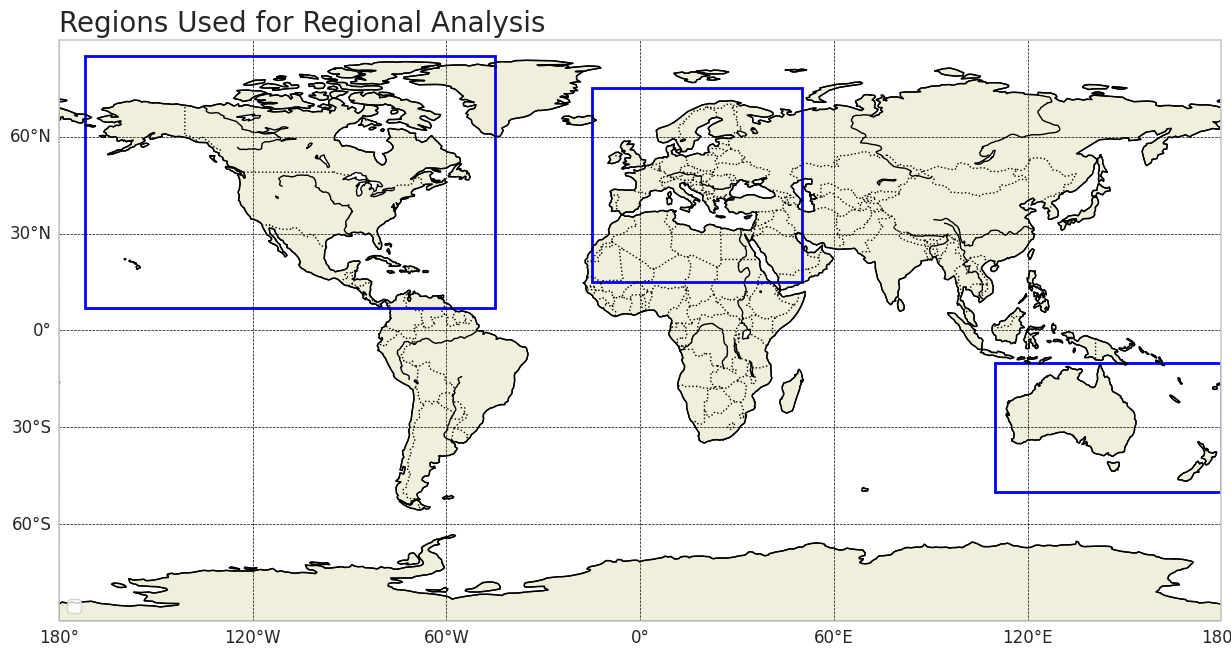

In [14]:
cp.plot_boxes(
    box_list=[na_bounding_box_polygon, eu_bounding_box_polygon, au_bounding_box_polygon],
    box_names=['North America', 'Europe', 'Australia'],
    title='Regions Used for Regional Analysis',
    filename=basepath + 'docs/notebooks/figs/figure3_part1_regions.png'
)

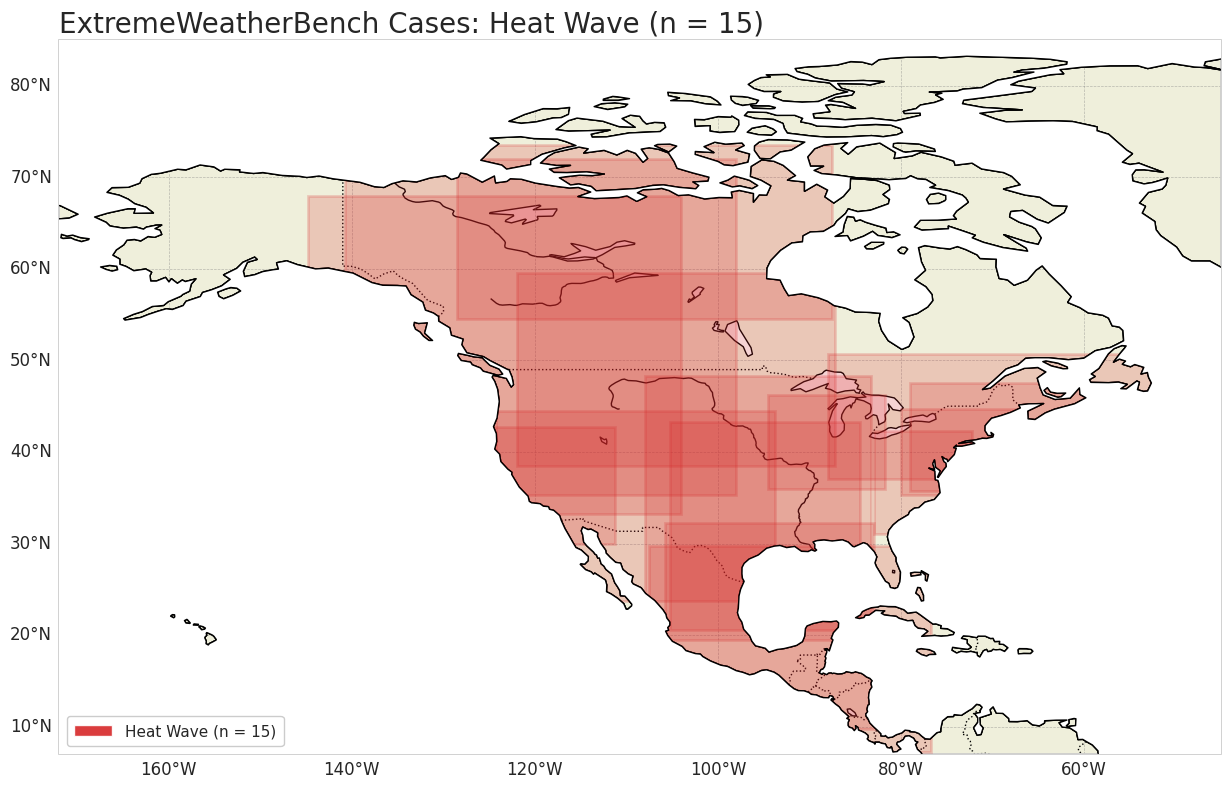

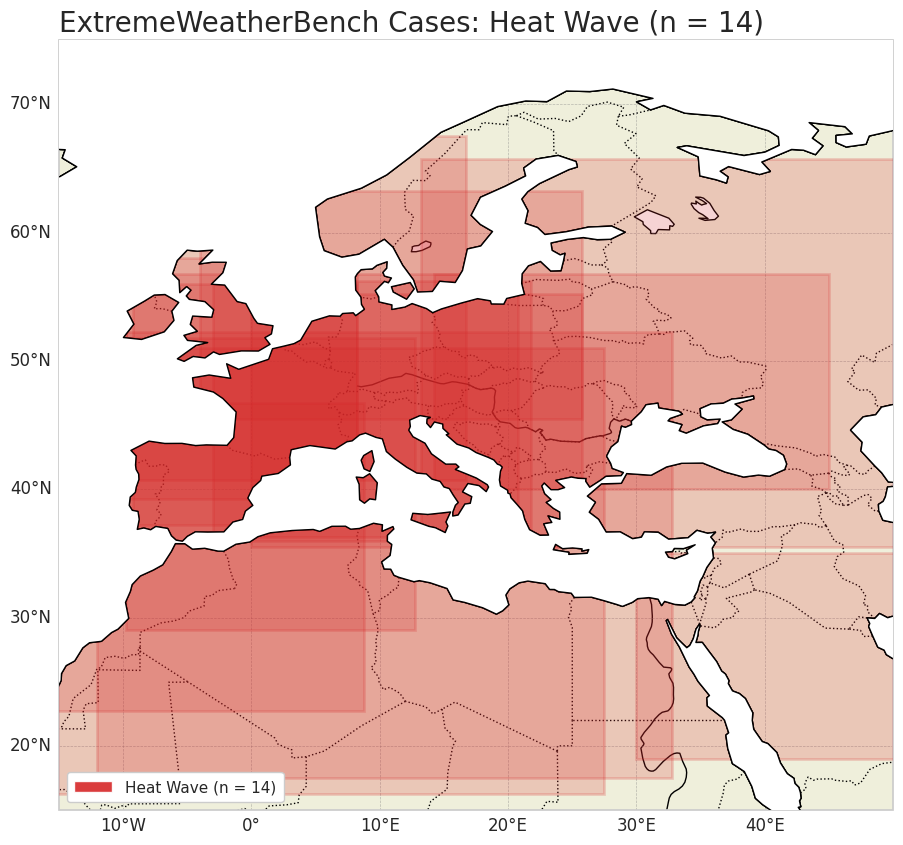

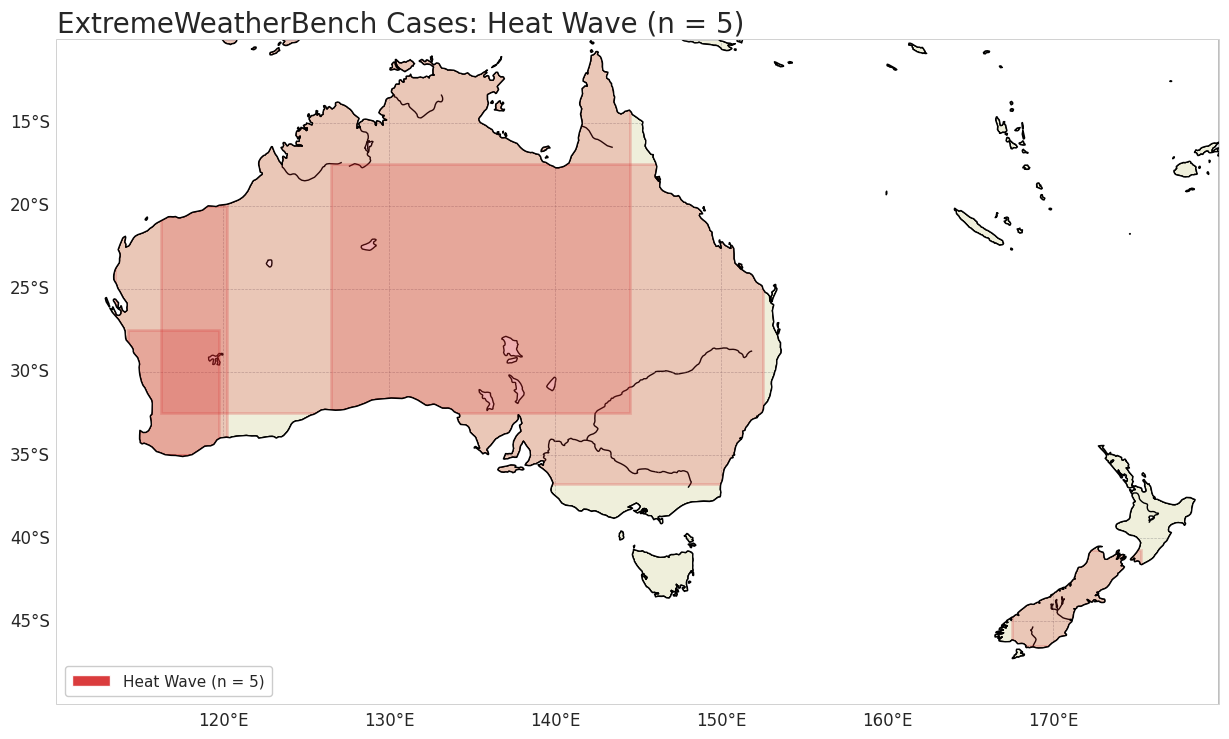

In [15]:
# plot North America cases
cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=na_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_NA.png', fill_boxes=True)

cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=eu_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_EU.png', fill_boxes=True)

cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=au_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_AU.png', fill_boxes=True)

In [16]:
# break the cases into different lists
na_cases = list()
eu_cases = list()
au_cases = list()

for heat_case in ewb_fourv2.case_operators:
    #print(heat_case.case_metadata)

    my_case = heat_case.case_metadata

    # collect the North America, Europe, and Australia cases
    if (shapely.intersects(my_case.location.geopandas.geometry[0], na_bounding_box_polygon)):
        na_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], eu_bounding_box_polygon)):
        eu_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], au_bounding_box_polygon)):
        au_cases.append(my_case.case_id_number)

print(f'North America Cases: {na_cases}')
print(f'Europe Cases: {eu_cases}')
print(f'Australia Cases: {au_cases}')


North America Cases: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 27, 27, 27, 27, 72, 72, 72, 72, 73, 73, 73, 73, 74, 74, 74, 74, 75, 75, 75, 75, 76, 76, 76, 76, 77, 77, 77, 77, 79, 79, 79, 79, 86, 86, 86, 86]
Europe Cases: [8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 14, 14, 14, 14, 15, 15, 15, 15, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 82, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 84, 85, 85, 85, 85]
Australia Cases: [7, 7, 7, 7, 26, 26, 26, 26, 28, 28, 28, 28, 29, 29, 29, 29, 80, 80, 80, 80]


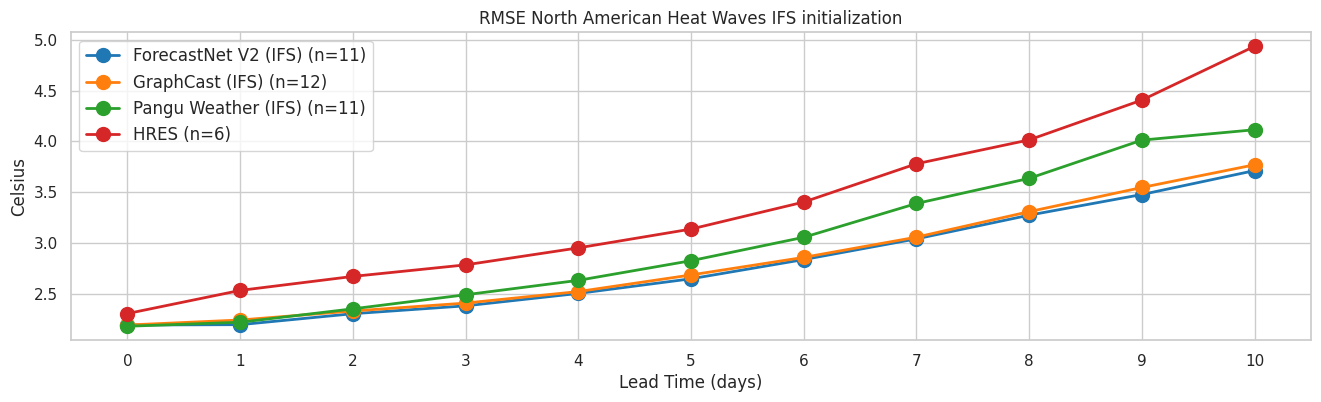

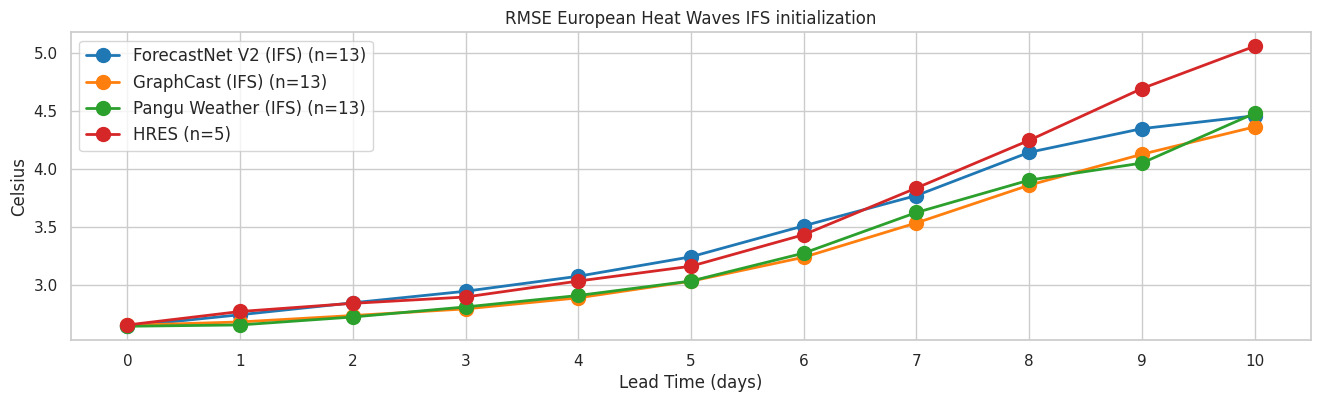

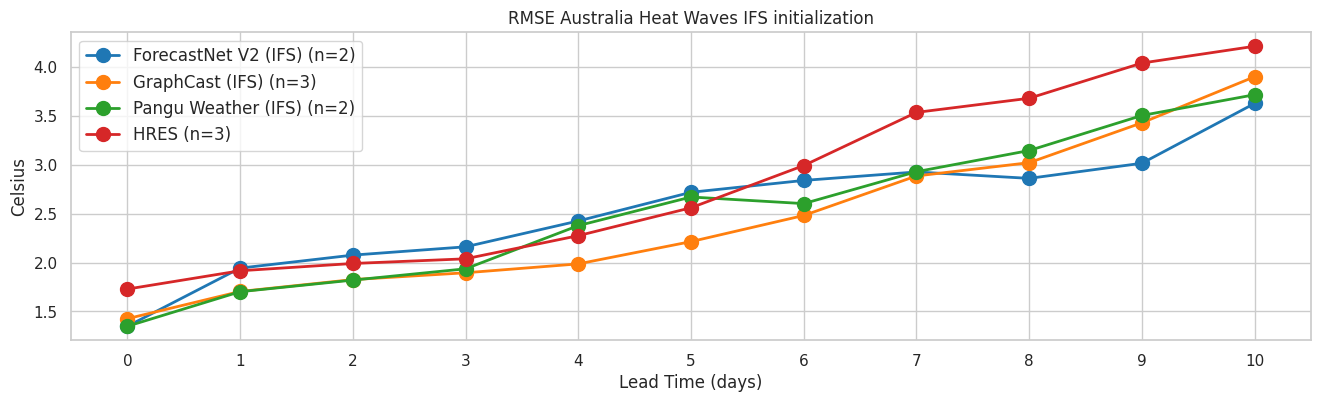

In [17]:
# plot the results for one metric for the three AI models versus HRES
na_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
na_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
na_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
na_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

na_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)


eu_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
eu_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
eu_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
eu_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

eu_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)
eu_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)
eu_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)
eu_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)



au_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
au_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
au_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
au_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

au_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)
au_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)
au_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)
au_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)


plot_results_by_metric(data=[na_fourv2_ifs_plot, na_gc_ifs_plot, na_pangu_ifs_plot, na_hres_plot], title='RMSE North American Heat Waves IFS initialization')
plot_results_by_metric(data=[eu_fourv2_ifs_plot, eu_gc_ifs_plot, eu_pangu_ifs_plot, eu_hres_plot], title='RMSE European Heat Waves IFS initialization')
plot_results_by_metric(data=[au_fourv2_ifs_plot, au_gc_ifs_plot, au_pangu_ifs_plot, au_hres_plot], title='RMSE Australia Heat Waves IFS initialization')


In [18]:
# look through the north america cases to decide which one to look in depth
for heat_case in ewb_cases.cases:
    
    if (heat_case.case_id_number in na_cases):
        print(heat_case)  

        #plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=na_bounding_box, fill_boxes=True, event_id=my_case.case_id_number)



IndividualCase(case_id_number=1, title='2021 Pacific Northwest', start_date=datetime.datetime(2021, 6, 20, 0, 0), end_date=datetime.datetime(2021, 7, 3, 0, 0), location=BoundingBoxRegion(latitude_min=33.25, latitude_max=68.0, longitude_min=215.25, longitude_max=256.0), event_type='heat_wave')
IndividualCase(case_id_number=2, title='2022 Upper Midwest', start_date=datetime.datetime(2022, 5, 7, 0, 0), end_date=datetime.datetime(2022, 5, 17, 0, 0), location=BoundingBoxRegion(latitude_min=19.5, latitude_max=48.25, longitude_min=252.0, longitude_max=276.75), event_type='heat_wave')
IndividualCase(case_id_number=3, title='2022 California', start_date=datetime.datetime(2022, 6, 7, 0, 0), end_date=datetime.datetime(2022, 6, 15, 0, 0), location=BoundingBoxRegion(latitude_min=23.75, latitude_max=44.5, longitude_min=235.75, longitude_max=266.25), event_type='heat_wave')
IndividualCase(case_id_number=4, title='2022 Texas', start_date=datetime.datetime(2022, 6, 30, 0, 0), end_date=datetime.datetime

In [19]:
my_case = ewb_cases.select_cases('case_id_number',3)


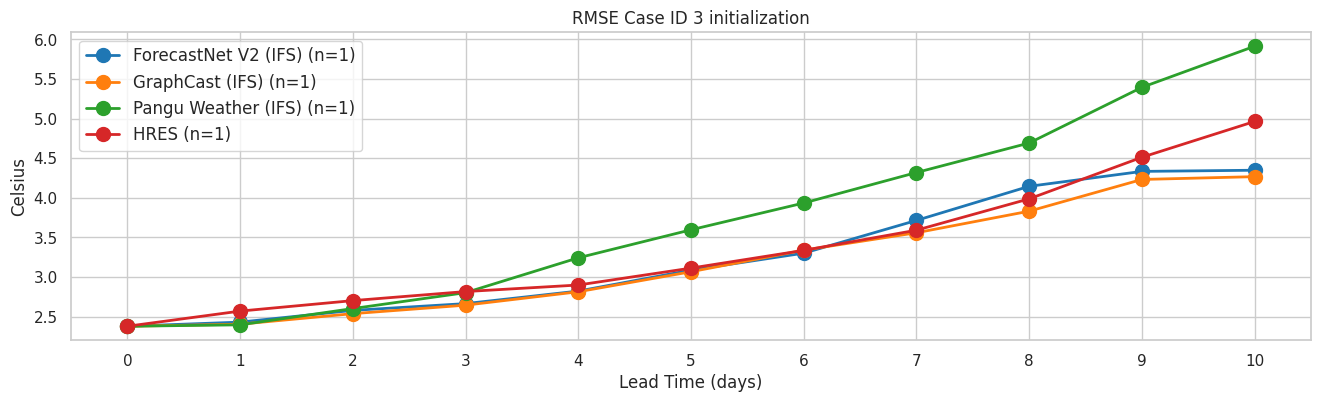

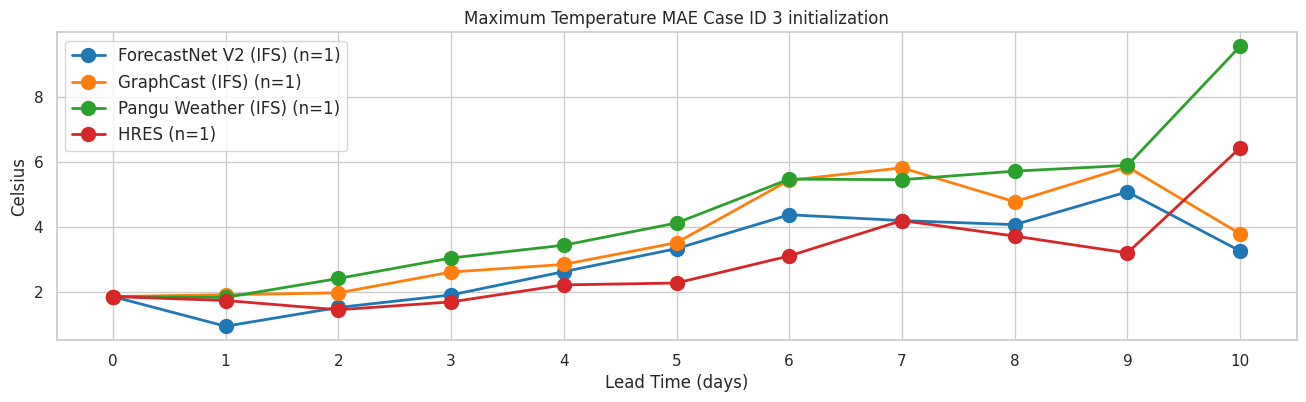

In [20]:
my_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
my_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
my_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
my_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

my_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])
my_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])
my_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])
my_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])


plot_results_by_metric(data=[my_fourv2_ifs_plot, my_gc_ifs_plot, my_pangu_ifs_plot, my_hres_plot], title='RMSE Case ID 3 initialization')


my_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])
my_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])
my_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])
my_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])

plot_results_by_metric(data=[my_fourv2_ifs_plot, my_gc_ifs_plot, my_pangu_ifs_plot, my_hres_plot], title='Maximum Temperature MAE Case ID 3 initialization')



In [21]:
# show the individual data for this case
era5 = defaults.era5_heatwave_target.open_and_maybe_preprocess_data_from_source()
temp_climatology_ds = xr.open_zarr('gs://extremeweatherbench/datasets/surface_air_temperature_1990_2019_climatology.zarr/')
temp_climatology_ds = temp_climatology_ds.sel(quantile=0.85)
# load in all of the events in the yaml file
heatwave_dataset = cp.generate_heatwave_dataset(era5, temp_climatology_ds, my_case)
cp.generate_heatwave_plots(heatwave_dataset, my_case)

AttributeError: 'list' object has no attribute 'start_date'